# **1. Perkenalan Dataset**


Dataset yang digunakan adalah Student Performance Dataset oleh Kundan Sagar Bedmutha. Dataset ini dapat diakses melalui kaggle melalui url berikut: https://www.kaggle.com/datasets/kundanbedmutha/student-performance-dataset

Dataset ini berisi informasi terkait dengan data akademik siswa serta informasi pendukung lainnya, dengan rincian sebagai berikut:

1. student ID, sebagai ID atau index tiap siswa.
2. age, berisi data umur setiap siswa.
3. gender, berisi data jenis kelamin siswa.
4. school_type, berisi data tipe sekolah tempat siswa bersekolah.
5. parent_education, berisi informasi terkait riwayat edukasi terakhir orang tua siswa.
6. study_hours, berisi data waktu belajar siswa.
7. attendance_percentage, berisi data persentasi kehadiran pelajar di sekolah.
8. internet_access, berisi data terkait apakah siswa memiliki akses internet untuk belajar.
9. travel_time, berisi data terkait berapa lama waktu yang ditempuh siswa untuk menuju ke sekolah dari rumah.
10. extra_activities, berisi informasi apakah terdapat aktivitas lain yang dilakukan siswa selain belajar.
11. study_method, berisi informasi metode belajar yang dilakukan oleh siswa.
12. math_score, berisi data skor ujian matematika siswa.
13. science_score, berisi data skor ujian sains siswa.
14. english_score, berisi data skor ujian bahasa inggris siswa.
15. overall_score, berisi rata-rata data skor ketiga ujian siswa.
16. final_grade, berisi nilai akhir yang diraih oleh siswa.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [19]:
#Library yang diperlukan.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [20]:
#Dataset Loading
df = pd.read_csv("Student_Performance_raw.csv")

In [21]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [23]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [24]:
#Membagi fitur numerik dan kategorikal
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

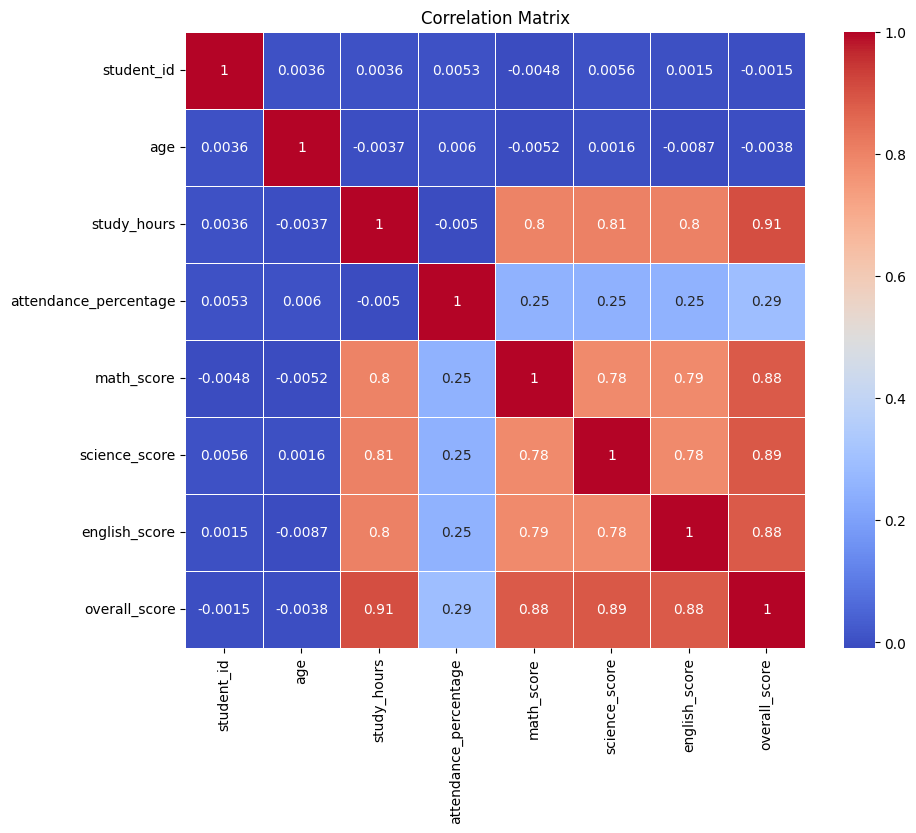

In [25]:
#Matriks Korelasi
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

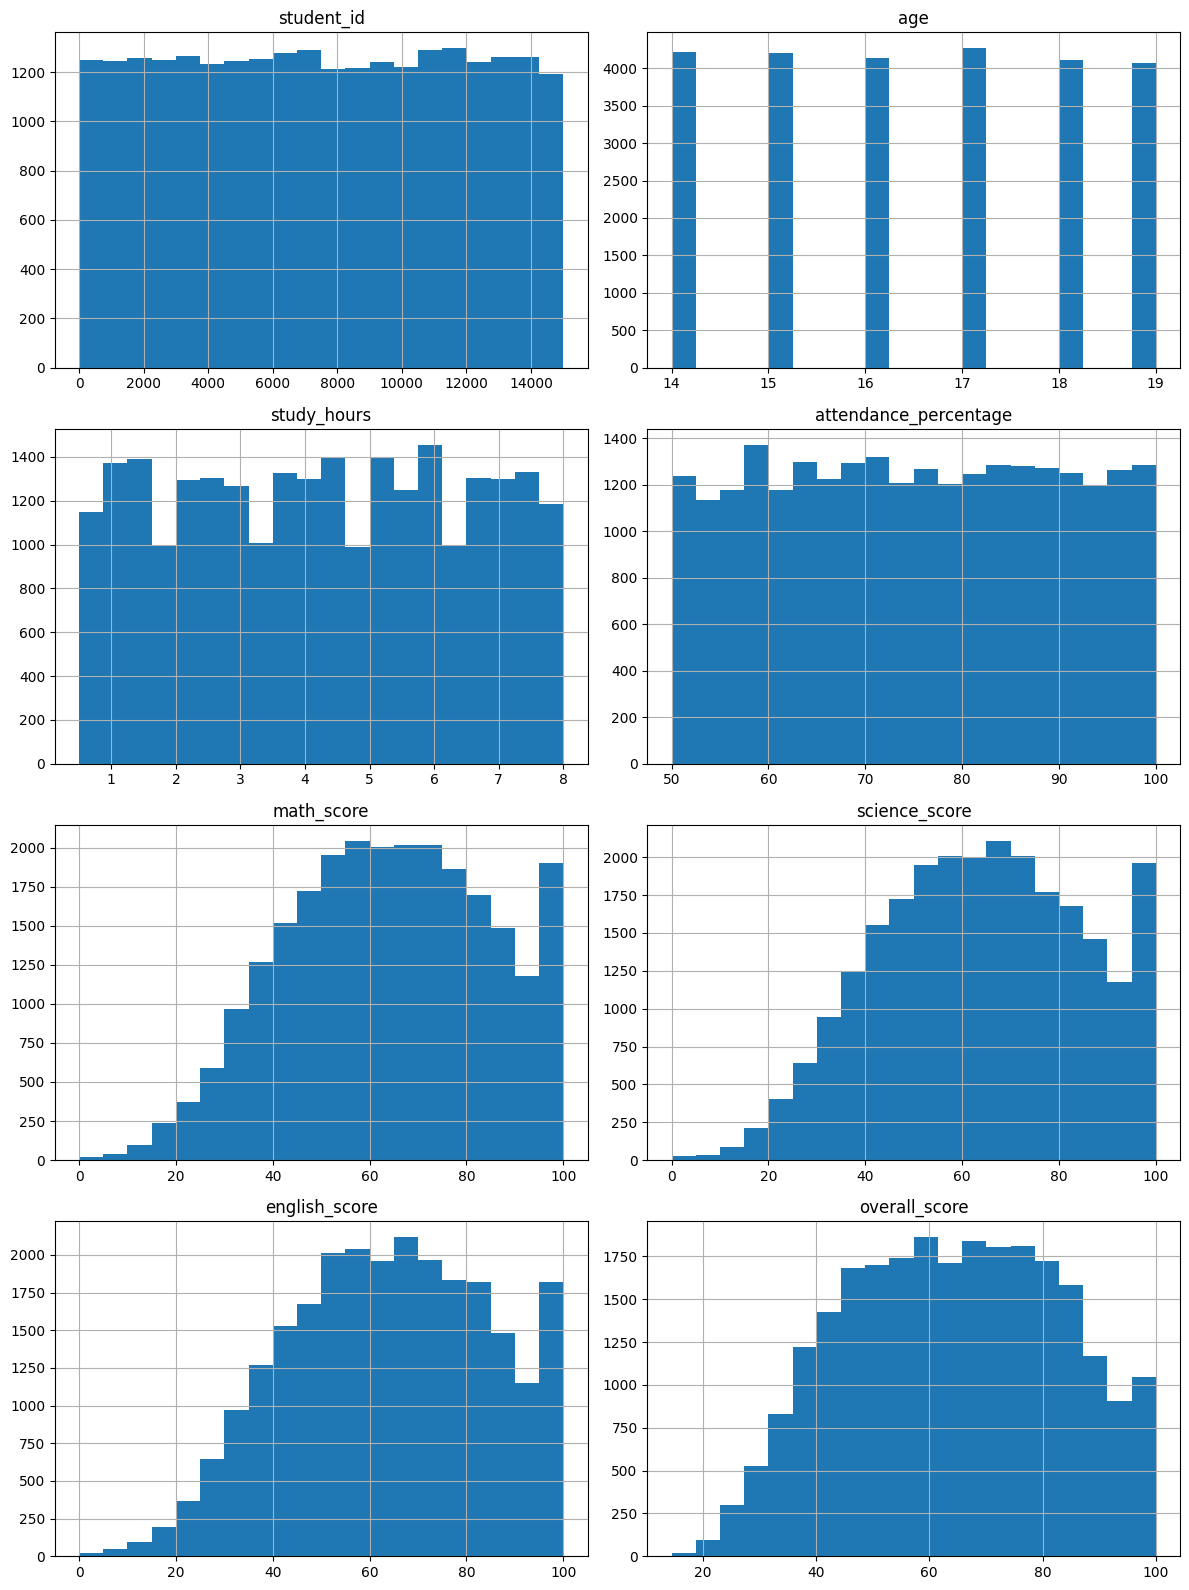

In [26]:
#Plot Fitur Numerik
plt.figure(figsize=(12, 16))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    df[col].hist(bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

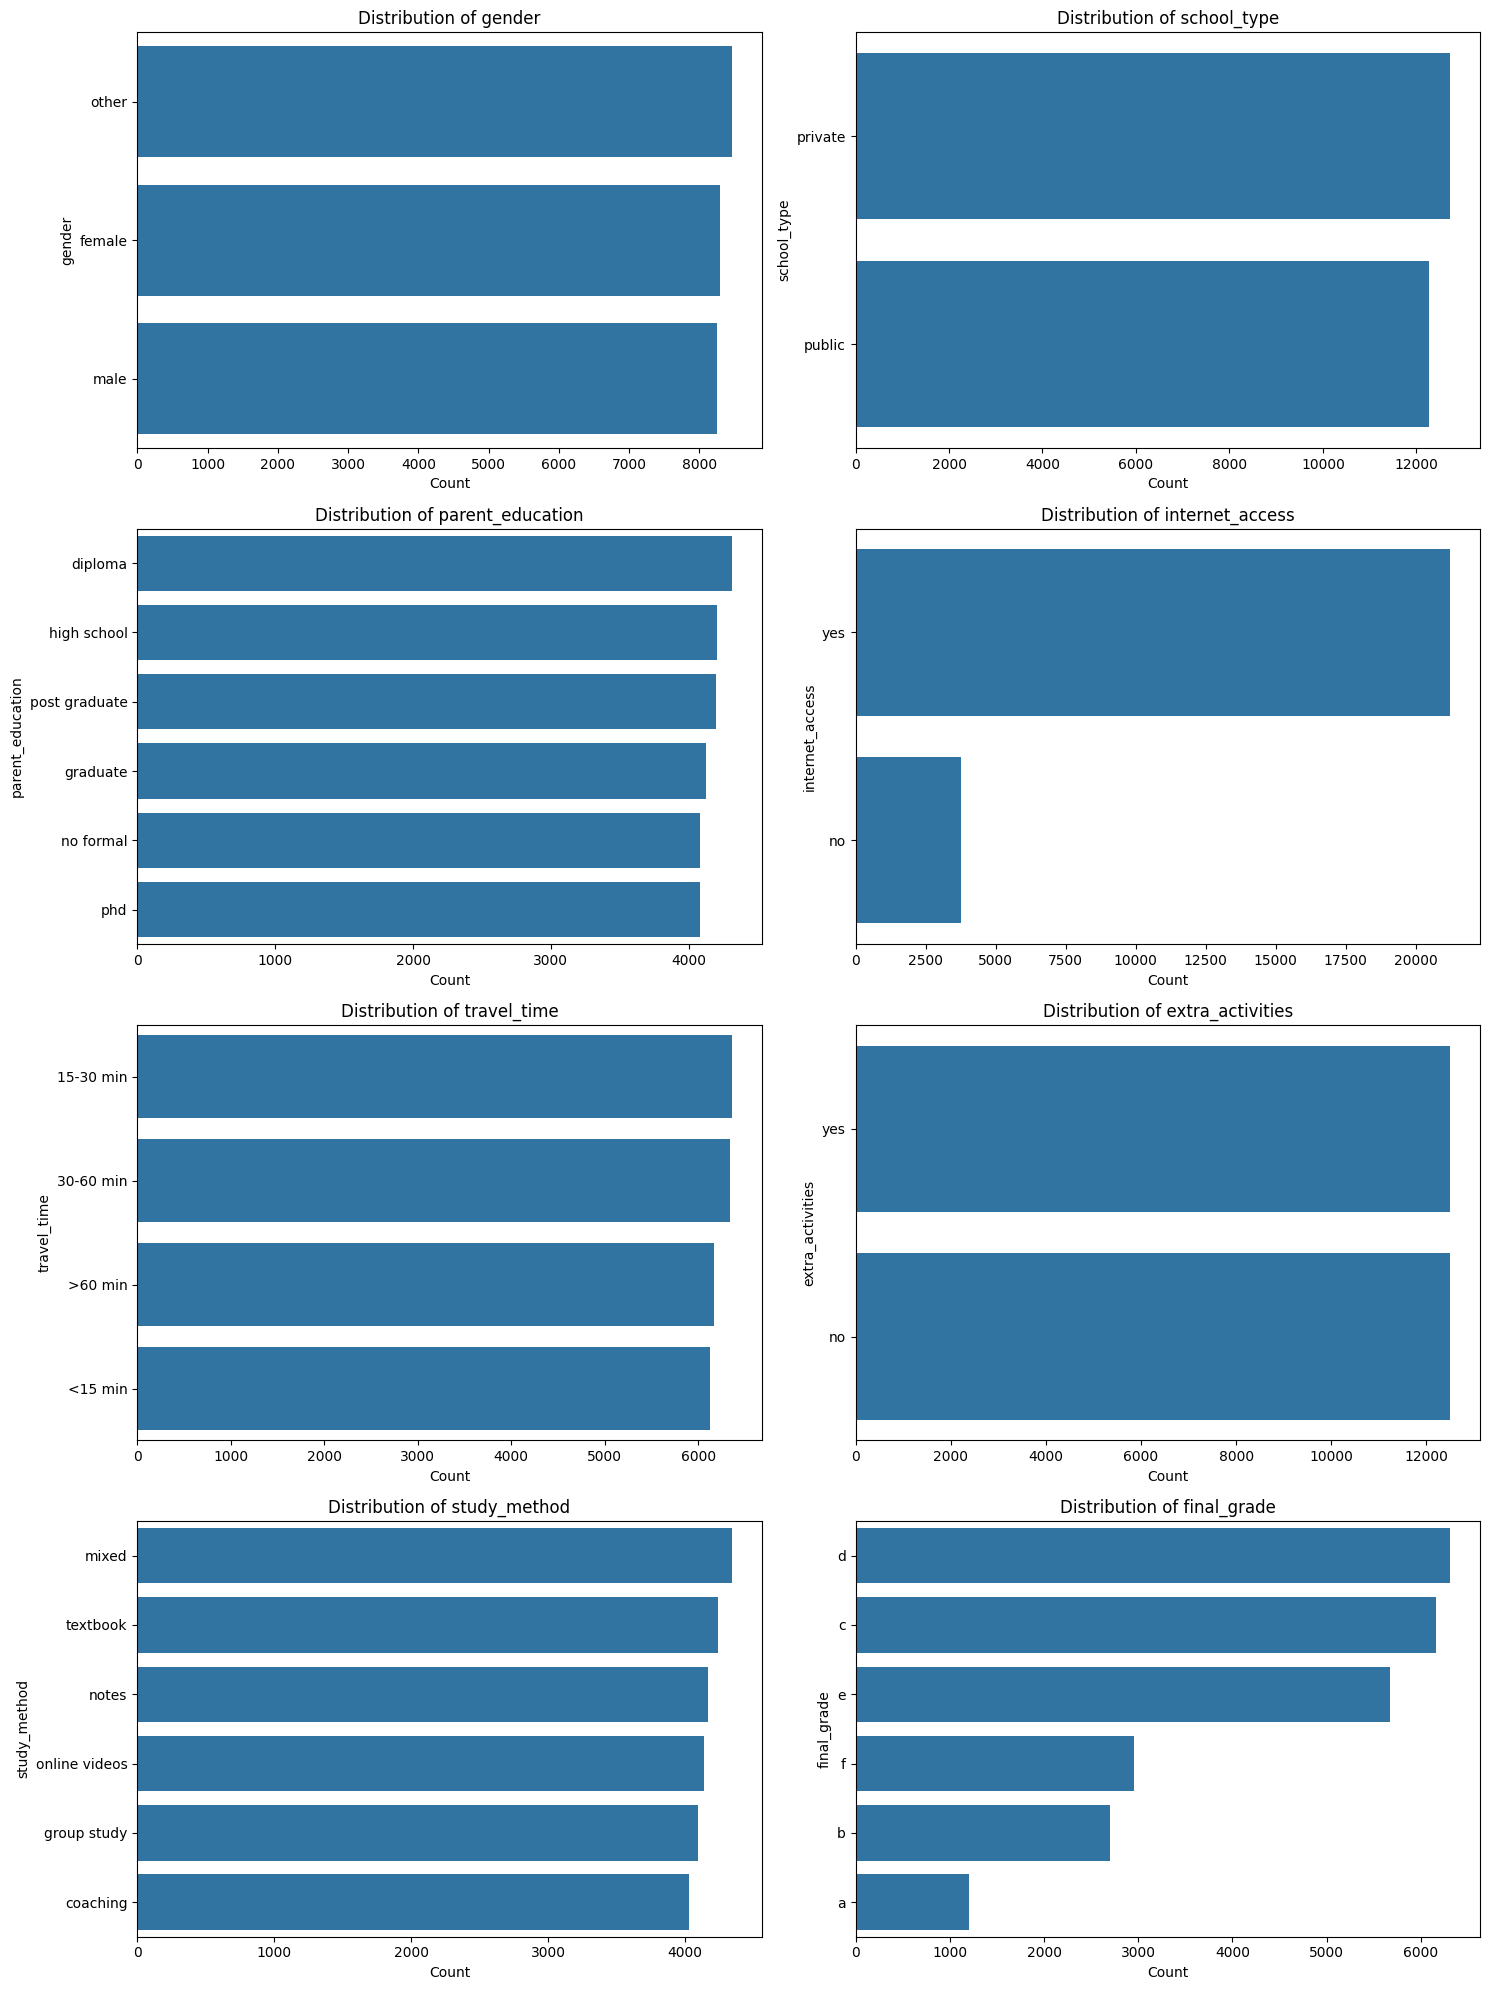

In [27]:
#Plot Fitur Kategorikal
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [28]:
#Pengecekan Missing Values
missing_values = df.isnull().sum()
print(missing_values)

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64


In [29]:
#Pengecekan Data Duplikat
df.duplicated().sum()

np.int64(10000)

In [30]:
#Menghapus Data Duplikat
df.drop_duplicates(inplace=True)

#Pengecekan setelah menghapus data Duplikat
df.duplicated().sum()

np.int64(0)

In [31]:
#Menghapus fitur yang tidak relevan
#Menghapus overall score dengan alasan merupakan rata-rata dari math_score, english_score, dan english_score
df = df.drop(columns=['student_id', 'gender', 'school_type', 'parent_education', 'travel_time', 'extra_activities', 'overall_score'])

In [32]:
#Membagi ulang fitur
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [33]:
#Melakukan Standardisasi dengan StandardScaler untuk fitur numerikal
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [34]:
#Melakukan Encoding dengan LabelEncoder untuk fitur kategorikal
label_encoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(label_encoder.fit_transform)

In [35]:
#Menangani Outlier
numeric_features_for_outlier = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_features_for_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

df.head()

,age,study_hours,attendance_percentage,internet_access,study_method,math_score,science_score,english_score,final_grade
0,-1.452929,-0.533685,0.646376,1,3,-1.007423,-0.397167,-0.321639,4
1,0.893912,-0.257489,0.889420,1,5,-0.295161,0.240109,0.052291,3
2,0.307202,1.675885,-0.659120,1,3,1.005076,1.486128,0.742624,1
3,-0.279509,-1.454339,-1.172985,1,3,-0.926159,-1.724034,-0.431900,4
4,-0.279509,-1.362274,-0.971606,1,1,-2.623159,-1.476733,-1.616013,5


In [36]:
#Membagi Dataset
X = df.drop(columns=['final_grade'])
y = df['final_grade']

In [37]:
output_dir = 'Student_Performance_Preprocessing'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
X.to_csv(os.path.join(output_dir, 'X.csv'), index=False)
y.to_csv(os.path.join(output_dir, 'y.csv'), index=False)
print(f"Dataset telah disimpan dalam folder {output_dir}")

Dataset telah disimpan dalam folder Student_Performance_Preprocessing
